## EECE5644 Assignment 2 - Question 2

#### Import necessary libraries for numerical computation, optimization, and visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.linalg import inv
import pandas as pd
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#### Define function to compute cubic polynomial features from input vector x

In [2]:
def compute_cubic_features(X):
    n_samples = X.shape[0]
    x1 = X[:, 0]
    x2 = X[:, 1]
    Phi = np.column_stack([
        np.ones(n_samples),    # 1
        x1,                     # x1
        x2,                     # x2
        x1**2,                  # x1^2
        x1 * x2,                # x1*x2
        x2**2,                  # x2^2
        x1**3,                  # x1^3
        (x1**2) * x2,           # x1^2*x2
        x1 * (x2**2),           # x1*x2^2
        x2**3                   # x2^3
    ])
    return Phi
X_test = np.array([[1.0, 2.0], [0.5, -1.0]])
Phi_test = compute_cubic_features(X_test)
print("Feature computation test:")
print(f"Input shape: {X_test.shape}")
print(f"Output shape: {Phi_test.shape}")
print(f"\nExample features for x=[1.0, 2.0]:")
print(f"  {Phi_test[0]}")
print("Feature names: [1, x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3]")

Feature computation test:
Input shape: (2, 2)
Output shape: (2, 10)

Example features for x=[1.0, 2.0]:
  [1. 1. 2. 1. 2. 4. 1. 2. 4. 8.]
Feature names: [1, x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3]


#### Generate synthetic dataset according to the problem specification

In [3]:
def generate_cubic_polynomial_data(n_samples, w_true, sigma, x_range=(-2, 2)):
    X = np.random.uniform(x_range[0], x_range[1], size=(n_samples, 2))
    Phi = compute_cubic_features(X)
    y = Phi @ w_true + np.random.normal(0, sigma, n_samples)
    return X, y
w_true = np.array([1.0, -0.5, 0.3, 0.2, -0.1, 0.15, -0.05, 0.1, -0.08, 0.12])
sigma_true = 0.5
n_train = 100
n_validate = 1000
print(f"Generating synthetic data...")
print(f"True noise std: σ = {sigma_true}")
print(f"Number of polynomial coefficients: {len(w_true)}")
print(f"Training samples: {n_train}")
print(f"Validation samples: {n_validate}")
X_train, y_train = generate_cubic_polynomial_data(n_train, w_true, sigma_true)
X_validate, y_validate = generate_cubic_polynomial_data(n_validate, w_true, sigma_true)
print("\nData generated successfully!")
print(f"\nTraining set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_train range: [{y_train.min():.3f}, {y_train.max():.3f}]")
print(f"\nValidation set:")
print(f"  X_validate shape: {X_validate.shape}")
print(f"  y_validate shape: {y_validate.shape}")
print(f"  y_validate range: [{y_validate.min():.3f}, {y_validate.max():.3f}]")

Generating synthetic data...
True noise std: σ = 0.5
Number of polynomial coefficients: 10
Training samples: 100
Validation samples: 1000

Data generated successfully!

Training set:
  X_train shape: (100, 2)
  y_train shape: (100,)
  y_train range: [-0.694, 6.768]

Validation set:
  X_validate shape: (1000, 2)
  y_validate shape: (1000,)
  y_validate range: [-1.783, 6.757]


#### Visualize the training data in 3D space

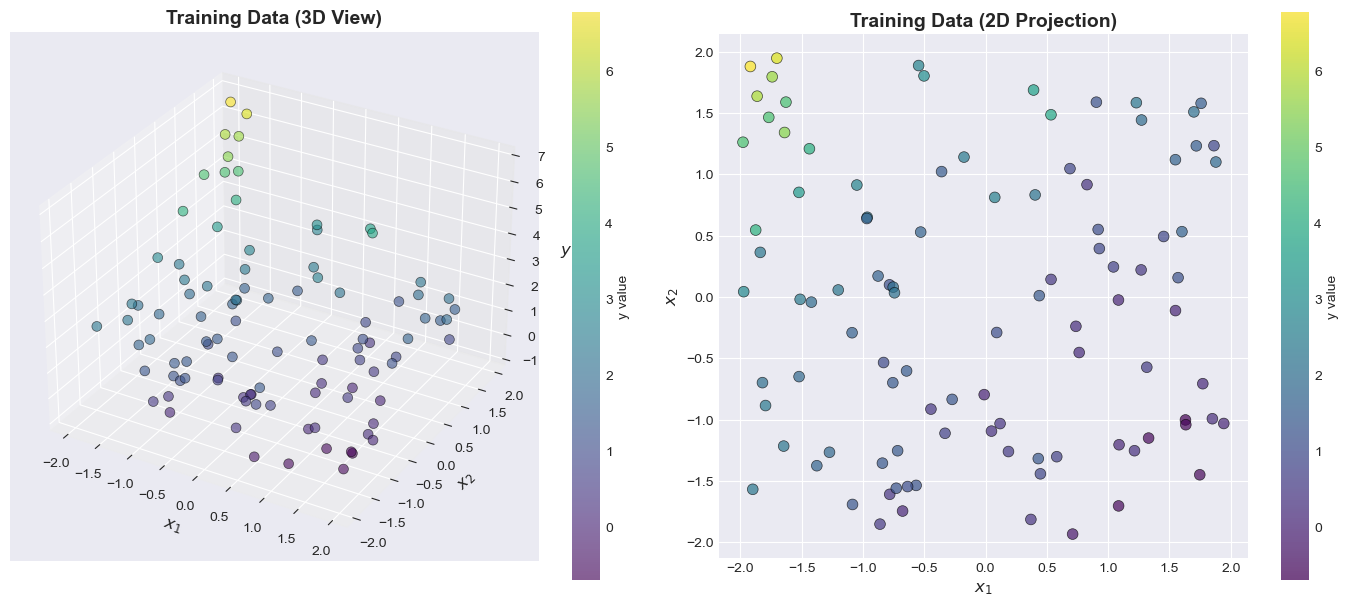

In [5]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, 
                     c=y_train, cmap='viridis', s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
ax1.set_xlabel('$x_1$', fontsize=12)
ax1.set_ylabel('$x_2$', fontsize=12)
ax1.set_zlabel('$y$', fontsize=12)
ax1.set_title('Training Data (3D View)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='y value')
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X_train[:, 0], X_train[:, 1], 
                       c=y_train, cmap='viridis', s=60, alpha=0.7, edgecolors='k', linewidth=0.5)
ax2.set_xlabel('$x_1$', fontsize=12)
ax2.set_ylabel('$x_2$', fontsize=12)
ax2.set_title('Training Data (2D Projection)', fontsize=14, fontweight='bold')
ax2.set_aspect('equal')
plt.colorbar(scatter2, ax=ax2, label='y value')
plt.tight_layout()
plt.show()

#### Maximum Likelihood (ML) Estimation

#### Implement the Maximum Likelihood estimator using closed-form solution

In [6]:
def ml_estimator(X, y):
    Phi = compute_cubic_features(X)
    w_ml = np.linalg.lstsq(Phi, y, rcond=None)[0]
    return w_ml

#### Apply ML estimator to the training data

In [7]:
w_ml = ml_estimator(X_train, y_train)
print("Maximum Likelihood Estimation Results:")
print("="*70)
print("\nEstimated parameters (w_ML):")
for i, (w_est, w_t) in enumerate(zip(w_ml, w_true)):
    print(f"  w[{i}]: {w_est:8.4f}  (true: {w_t:7.4f})  error: {abs(w_est - w_t):7.4f}")
Phi_train = compute_cubic_features(X_train)
y_train_pred_ml = Phi_train @ w_ml
train_mse_ml = np.mean((y_train - y_train_pred_ml)**2)
Phi_validate = compute_cubic_features(X_validate)
y_validate_pred_ml = Phi_validate @ w_ml
validate_mse_ml = np.mean((y_validate - y_validate_pred_ml)**2)
print(f"\nPerformance:")
print(f"  Training MSE:   {train_mse_ml:.6f}")
print(f"  Validation MSE: {validate_mse_ml:.6f}")
print("="*70)

Maximum Likelihood Estimation Results:

Estimated parameters (w_ML):
  w[0]:   1.0256  (true:  1.0000)  error:  0.0256
  w[1]:  -0.4311  (true: -0.5000)  error:  0.0689
  w[2]:   0.4874  (true:  0.3000)  error:  0.1874
  w[3]:   0.1750  (true:  0.2000)  error:  0.0250
  w[4]:  -0.0617  (true: -0.1000)  error:  0.0383
  w[5]:   0.2109  (true:  0.1500)  error:  0.0609
  w[6]:  -0.0556  (true: -0.0500)  error:  0.0056
  w[7]:   0.0879  (true:  0.1000)  error:  0.0121
  w[8]:  -0.0966  (true: -0.0800)  error:  0.0166
  w[9]:   0.0675  (true:  0.1200)  error:  0.0525

Performance:
  Training MSE:   0.233694
  Validation MSE: 0.256598


#### Maximum A Posteriori (MAP) Estimation

#### Implement the MAP estimator with Gaussian prior

In [8]:
def map_estimator(X, y, gamma, sigma_sq=None):
    Phi = compute_cubic_features(X)
    n_features = Phi.shape[1]
    if sigma_sq is None:
        w_ml_temp = np.linalg.lstsq(Phi, y, rcond=None)[0]
        residuals = y - Phi @ w_ml_temp
        sigma_sq = np.mean(residuals**2)
    lambda_reg = sigma_sq / gamma
    A = Phi.T @ Phi + lambda_reg * np.eye(n_features)
    b = Phi.T @ y
    w_map = np.linalg.solve(A, b)
    return w_map

#### Test MAP estimator with a single gamma value

In [9]:
gamma_test = 1.0
w_map_test = map_estimator(X_train, y_train, gamma_test)
print(f"MAP Estimation Test (γ = {gamma_test}):")
print("="*70)
print("\nEstimated parameters (w_MAP):")
for i, (w_map, w_ml_val, w_t) in enumerate(zip(w_map_test, w_ml, w_true)):
    print(f"  w[{i}]: {w_map:8.4f}  (ML: {w_ml_val:8.4f})  (true: {w_t:7.4f})")
y_validate_pred_map = Phi_validate @ w_map_test
validate_mse_map = np.mean((y_validate - y_validate_pred_map)**2)
print(f"\nValidation MSE (MAP with γ={gamma_test}): {validate_mse_map:.6f}")
print(f"Validation MSE (ML):                     {validate_mse_ml:.6f}")
print("="*70)

MAP Estimation Test (γ = 1.0):

Estimated parameters (w_MAP):
  w[0]:   1.0173  (ML:   1.0256)  (true:  1.0000)
  w[1]:  -0.4264  (ML:  -0.4311)  (true: -0.5000)
  w[2]:   0.4793  (ML:   0.4874)  (true:  0.3000)
  w[3]:   0.1771  (ML:   0.1750)  (true:  0.2000)
  w[4]:  -0.0607  (ML:  -0.0617)  (true: -0.1000)
  w[5]:   0.2127  (ML:   0.2109)  (true:  0.1500)
  w[6]:  -0.0572  (ML:  -0.0556)  (true: -0.0500)
  w[7]:   0.0888  (ML:   0.0879)  (true:  0.1000)
  w[8]:  -0.0964  (ML:  -0.0966)  (true: -0.0800)
  w[9]:   0.0698  (ML:   0.0675)  (true:  0.1200)

Validation MSE (MAP with γ=1.0): 0.256083
Validation MSE (ML):                     0.256598


#### Systematically evaluate MAP estimator for a range of gamma values

In [10]:
gamma_values = np.logspace(-6, 6, 50)  # From 10^-6 to 10^6
train_mse_map = []
validate_mse_map = []
w_map_all = []
w_norms = []
print(f"Evaluating MAP estimator for {len(gamma_values)} gamma values...")
print(f"Gamma range: [{gamma_values.min():.2e}, {gamma_values.max():.2e}]")
for gamma in gamma_values:
    w_map = map_estimator(X_train, y_train, gamma)
    w_map_all.append(w_map)
    w_norms.append(np.linalg.norm(w_map))
    y_train_pred = Phi_train @ w_map
    train_mse = np.mean((y_train - y_train_pred)**2)
    train_mse_map.append(train_mse)
    y_validate_pred = Phi_validate @ w_map
    validate_mse = np.mean((y_validate - y_validate_pred)**2)
    validate_mse_map.append(validate_mse)
train_mse_map = np.array(train_mse_map)
validate_mse_map = np.array(validate_mse_map)
w_norms = np.array(w_norms)
best_idx = np.argmin(validate_mse_map)
gamma_optimal = gamma_values[best_idx]
w_map_optimal = w_map_all[best_idx]
validate_mse_optimal = validate_mse_map[best_idx]
print(f"\nOptimal γ: {gamma_optimal:.4e}")
print(f"Minimum validation MSE: {validate_mse_optimal:.6f}")
print(f"ML validation MSE: {validate_mse_ml:.6f}")
print(f"\nImprovement over ML: {((validate_mse_ml - validate_mse_optimal)/validate_mse_ml * 100):.2f}%")

Evaluating MAP estimator for 50 gamma values...
Gamma range: [1.00e-06, 1.00e+06]

Optimal γ: 1.3895e-01
Minimum validation MSE: 0.254793
ML validation MSE: 0.256598

Improvement over ML: 0.70%


#### Visualize validation MSE as a function of gamma

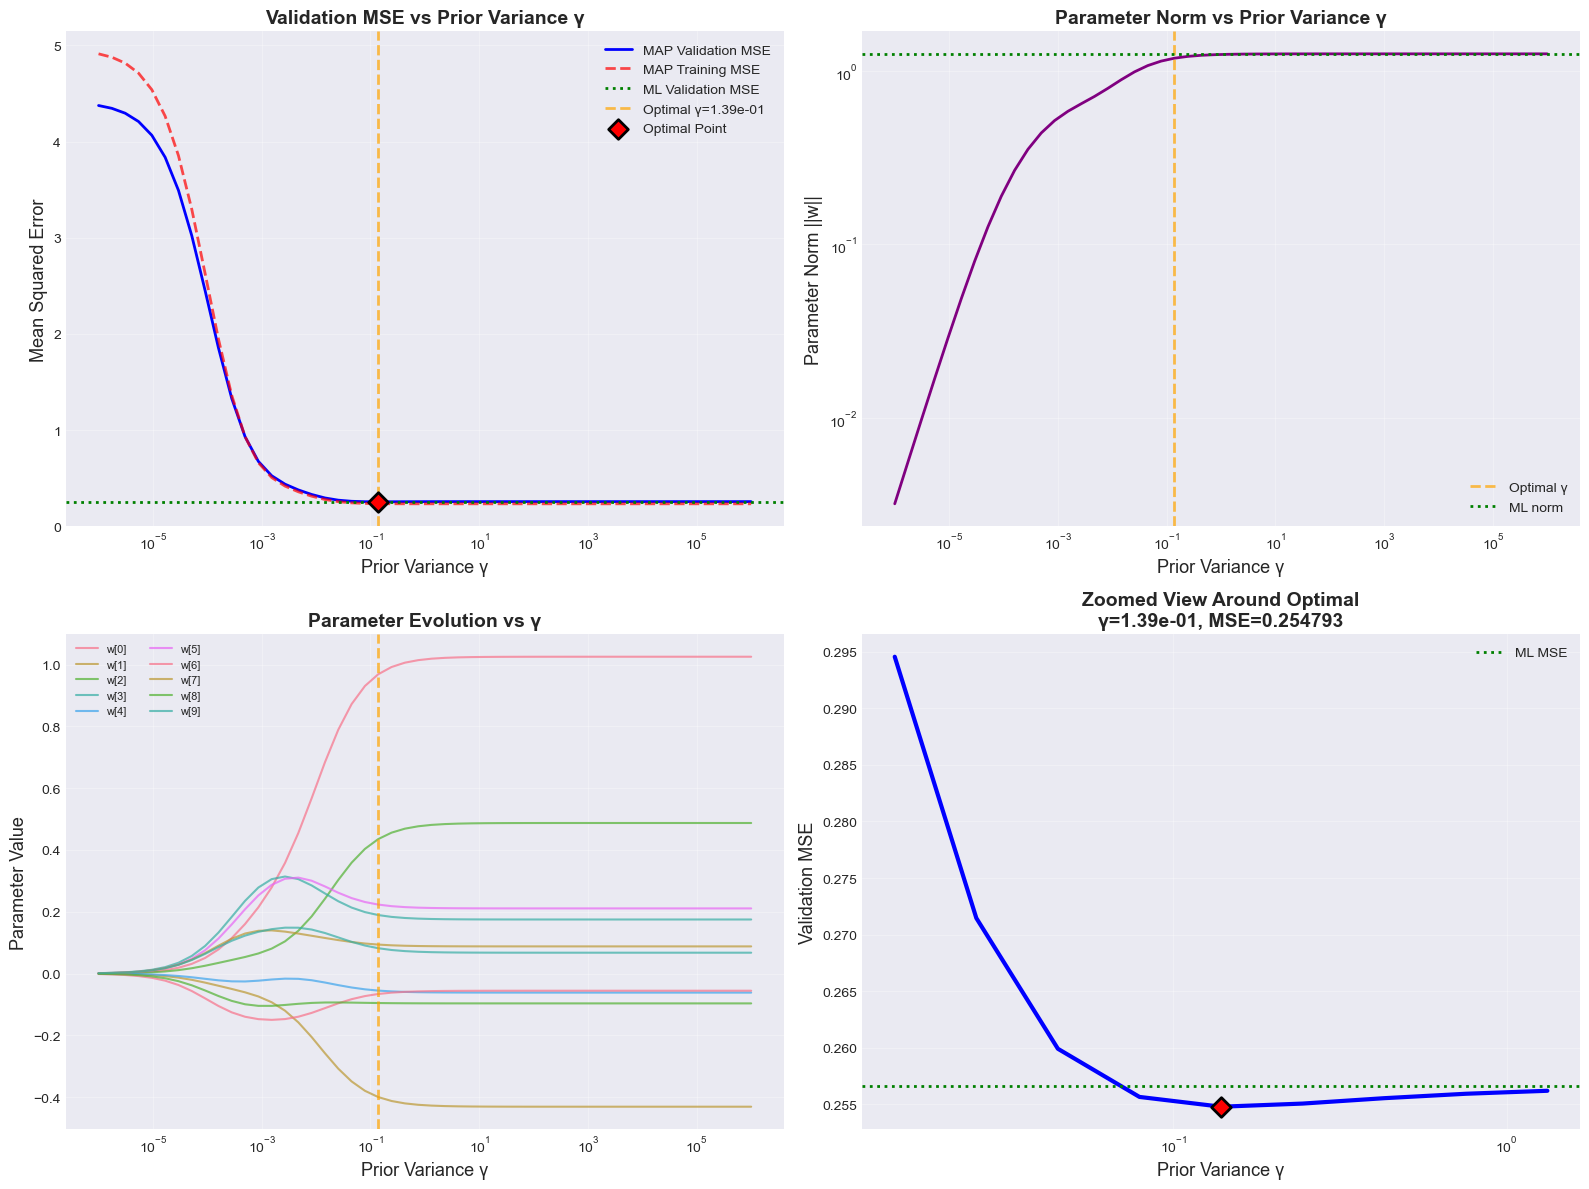

MAP analysis visualization complete!


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
ax1 = axes[0, 0]
ax1.semilogx(gamma_values, validate_mse_map, 'b-', linewidth=2, label='MAP Validation MSE')
ax1.semilogx(gamma_values, train_mse_map, 'r--', linewidth=2, alpha=0.7, label='MAP Training MSE')
ax1.axhline(y=validate_mse_ml, color='green', linestyle=':', linewidth=2, label='ML Validation MSE')
ax1.axvline(x=gamma_optimal, color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'Optimal γ={gamma_optimal:.2e}')
ax1.scatter([gamma_optimal], [validate_mse_optimal], color='red', s=100, zorder=5, 
           marker='D', edgecolors='black', linewidth=2, label='Optimal Point')
ax1.set_xlabel('Prior Variance γ', fontsize=13)
ax1.set_ylabel('Mean Squared Error', fontsize=13)
ax1.set_title('Validation MSE vs Prior Variance γ', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax2 = axes[0, 1]
ax2.loglog(gamma_values, w_norms, 'purple', linewidth=2)
ax2.axvline(x=gamma_optimal, color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'Optimal γ')
ax2.axhline(y=np.linalg.norm(w_ml), color='green', linestyle=':', linewidth=2, label='ML norm')
ax2.set_xlabel('Prior Variance γ', fontsize=13)
ax2.set_ylabel('Parameter Norm ||w||', fontsize=13)
ax2.set_title('Parameter Norm vs Prior Variance γ', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax3 = axes[1, 0]
w_map_array = np.array(w_map_all)
for i in range(w_map_array.shape[1]):
    ax3.semilogx(gamma_values, w_map_array[:, i], linewidth=1.5, alpha=0.7, label=f'w[{i}]')
ax3.axvline(x=gamma_optimal, color='orange', linestyle='--', linewidth=2, alpha=0.7)
ax3.set_xlabel('Prior Variance γ', fontsize=13)
ax3.set_ylabel('Parameter Value', fontsize=13)
ax3.set_title('Parameter Evolution vs γ', fontsize=14, fontweight='bold')
ax3.legend(fontsize=8, ncol=2)
ax3.grid(True, alpha=0.3)
ax4 = axes[1, 1]
zoom_range = (gamma_values > gamma_optimal/10) & (gamma_values < gamma_optimal*10)
ax4.semilogx(gamma_values[zoom_range], validate_mse_map[zoom_range], 'b-', linewidth=3)
ax4.scatter([gamma_optimal], [validate_mse_optimal], color='red', s=100, zorder=5, 
           marker='D', edgecolors='black', linewidth=2)
ax4.axhline(y=validate_mse_ml, color='green', linestyle=':', linewidth=2, label='ML MSE')
ax4.set_xlabel('Prior Variance γ', fontsize=13)
ax4.set_ylabel('Validation MSE', fontsize=13)
ax4.set_title(f'Zoomed View Around Optimal\nγ={gamma_optimal:.2e}, MSE={validate_mse_optimal:.6f}', 
             fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("MAP analysis visualization complete!")

#### Compare ML and optimal MAP predictions visually

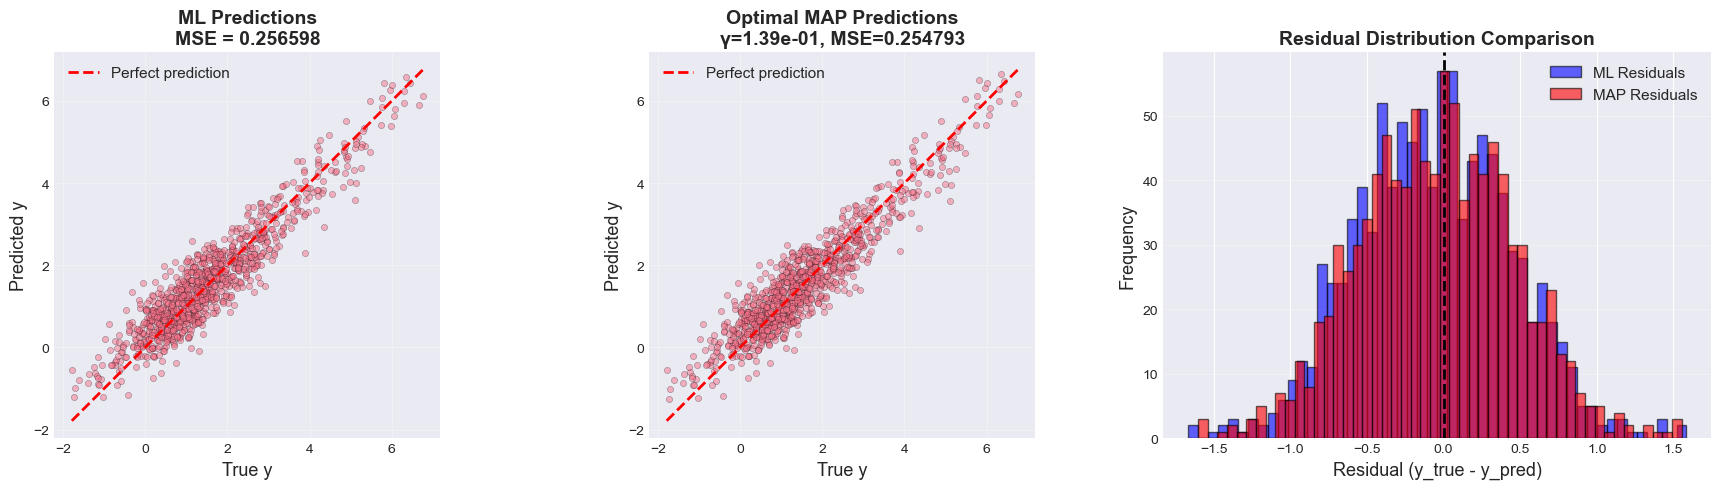

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax1 = axes[0]
ax1.scatter(y_validate, y_validate_pred_ml, alpha=0.5, s=20, edgecolors='k', linewidth=0.3)
ax1.plot([y_validate.min(), y_validate.max()], [y_validate.min(), y_validate.max()], 
        'r--', linewidth=2, label='Perfect prediction')
ax1.set_xlabel('True y', fontsize=13)
ax1.set_ylabel('Predicted y', fontsize=13)
ax1.set_title(f'ML Predictions\nMSE = {validate_mse_ml:.6f}', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax2 = axes[1]
y_validate_pred_map_opt = Phi_validate @ w_map_optimal
ax2.scatter(y_validate, y_validate_pred_map_opt, alpha=0.5, s=20, edgecolors='k', linewidth=0.3)
ax2.plot([y_validate.min(), y_validate.max()], [y_validate.min(), y_validate.max()], 
        'r--', linewidth=2, label='Perfect prediction')
ax2.set_xlabel('True y', fontsize=13)
ax2.set_ylabel('Predicted y', fontsize=13)
ax2.set_title(f'Optimal MAP Predictions\nγ={gamma_optimal:.2e}, MSE={validate_mse_optimal:.6f}', 
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax3 = axes[2]
residuals_ml = y_validate - y_validate_pred_ml
residuals_map = y_validate - y_validate_pred_map_opt
ax3.hist(residuals_ml, bins=50, alpha=0.6, label='ML Residuals', color='blue', edgecolor='black')
ax3.hist(residuals_map, bins=50, alpha=0.6, label='MAP Residuals', color='red', edgecolor='black')
ax3.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax3.set_xlabel('Residual (y_true - y_pred)', fontsize=13)
ax3.set_ylabel('Frequency', fontsize=13)
ax3.set_title('Residual Distribution Comparison', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#### Compare parameter estimates: ML vs MAP vs True

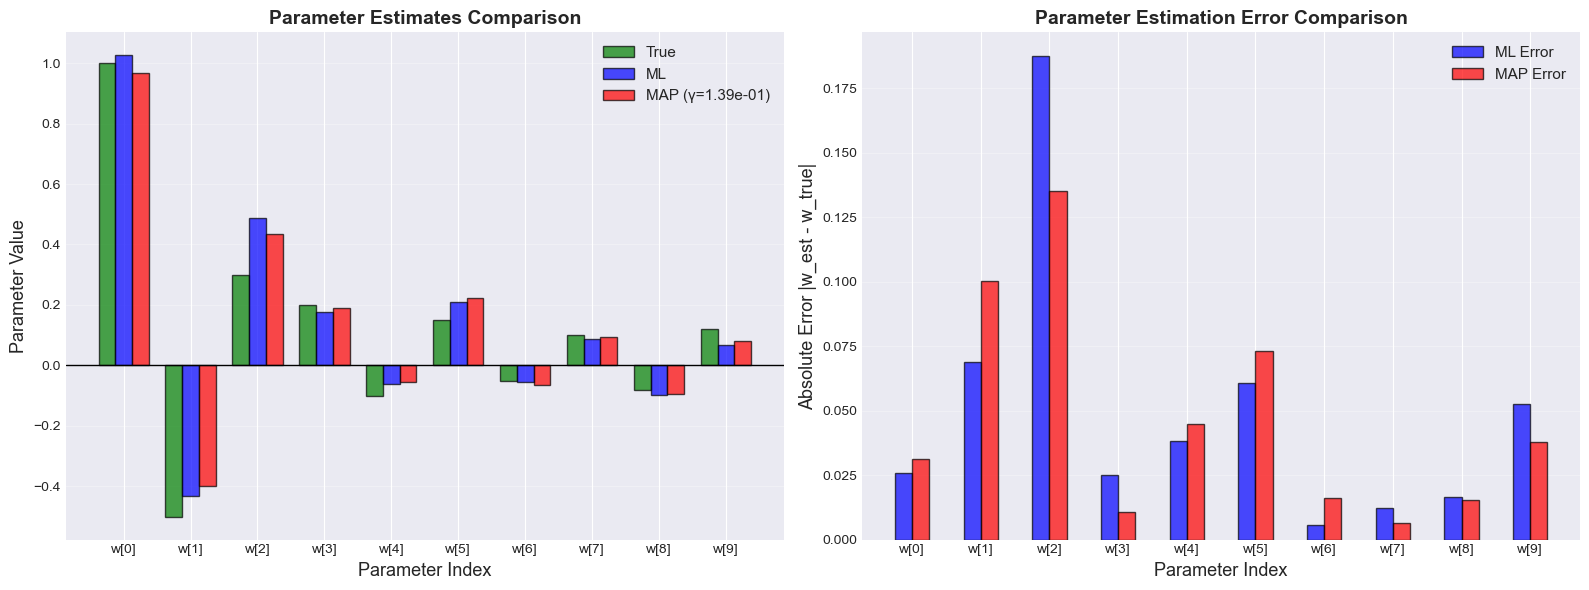


Parameter Comparison Summary:
Mean Absolute Error (MAE):
  ML:  0.049291
  MAP: 0.047115

Parameter Norm:
  True: 1.202414
  ML:   1.256547
  MAP:  1.185716


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax1 = axes[0]
x_pos = np.arange(len(w_true))
width = 0.25
ax1.bar(x_pos - width, w_true, width, label='True', color='green', alpha=0.7, edgecolor='black')
ax1.bar(x_pos, w_ml, width, label='ML', color='blue', alpha=0.7, edgecolor='black')
ax1.bar(x_pos + width, w_map_optimal, width, label=f'MAP (γ={gamma_optimal:.2e})', 
       color='red', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Parameter Index', fontsize=13)
ax1.set_ylabel('Parameter Value', fontsize=13)
ax1.set_title('Parameter Estimates Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'w[{i}]' for i in range(len(w_true))])
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linewidth=1)
ax2 = axes[1]
error_ml = np.abs(w_ml - w_true)
error_map = np.abs(w_map_optimal - w_true)
ax2.bar(x_pos - width/2, error_ml, width, label='ML Error', color='blue', alpha=0.7, edgecolor='black')
ax2.bar(x_pos + width/2, error_map, width, label='MAP Error', color='red', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Parameter Index', fontsize=13)
ax2.set_ylabel('Absolute Error |w_est - w_true|', fontsize=13)
ax2.set_title('Parameter Estimation Error Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'w[{i}]' for i in range(len(w_true))])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
print("\nParameter Comparison Summary:")
print("="*70)
print(f"Mean Absolute Error (MAE):")
print(f"  ML:  {np.mean(error_ml):.6f}")
print(f"  MAP: {np.mean(error_map):.6f}")
print(f"\nParameter Norm:")
print(f"  True: {np.linalg.norm(w_true):.6f}")
print(f"  ML:   {np.linalg.norm(w_ml):.6f}")
print(f"  MAP:  {np.linalg.norm(w_map_optimal):.6f}")
print("="*70)

#### Analyze behavior at extreme gamma values

In [17]:
gamma_small = 1e-6
gamma_large = 1e6
w_map_small = map_estimator(X_train, y_train, gamma_small)
w_map_large = map_estimator(X_train, y_train, gamma_large)
print("Analysis of Extreme Gamma Values:")
print("="*70)
print(f"\n1. Very small γ = {gamma_small:.2e} (Strong prior, high regularization):")
print(f"   Parameter norm: {np.linalg.norm(w_map_small):.6f}")
print(f"   Expected behavior: Parameters shrink toward zero")
print(f"   Validation MSE: {np.mean((y_validate - Phi_validate @ w_map_small)**2):.6f}")
print(f"\n2. Very large γ = {gamma_large:.2e} (Weak prior, low regularization):")
print(f"   Parameter norm: {np.linalg.norm(w_map_large):.6f}")
print(f"   ML parameter norm: {np.linalg.norm(w_ml):.6f}")
print(f"   Difference from ML: {np.linalg.norm(w_map_large - w_ml):.2e}")
print(f"   Expected behavior: MAP converges to ML")
print(f"   Validation MSE: {np.mean((y_validate - Phi_validate @ w_map_large)**2):.6f}")
print(f"\n3. Optimal γ = {gamma_optimal:.2e}:")
print(f"   Parameter norm: {np.linalg.norm(w_map_optimal):.6f}")
print(f"   Validation MSE: {validate_mse_optimal:.6f}")
print(f"   Balances bias-variance tradeoff")
print("\n" + "="*70)
print("Key Insights:")
print("  • As γ → 0: MAP → 0 (strong regularization, high bias, low variance)")
print("  • As γ → ∞: MAP → ML (weak regularization, low bias, high variance)")
print("  • Optimal γ balances bias and variance for best generalization")
print("="*70)

Analysis of Extreme Gamma Values:

1. Very small γ = 1.00e-06 (Strong prior, high regularization):
   Parameter norm: 0.003186
   Expected behavior: Parameters shrink toward zero
   Validation MSE: 4.374527

2. Very large γ = 1.00e+06 (Weak prior, low regularization):
   Parameter norm: 1.256547
   ML parameter norm: 1.256547
   Difference from ML: 1.34e-08
   Expected behavior: MAP converges to ML
   Validation MSE: 0.256598

3. Optimal γ = 1.39e-01:
   Parameter norm: 1.185716
   Validation MSE: 0.254793
   Balances bias-variance tradeoff

Key Insights:
  • As γ → 0: MAP → 0 (strong regularization, high bias, low variance)
  • As γ → ∞: MAP → ML (weak regularization, low bias, high variance)
  • Optimal γ balances bias and variance for best generalization


#### Create comprehensive summary table and save results

In [18]:
summary_data = {
    'Method': ['ML (OLS)', 'MAP (γ=1e-6)', f'MAP (γ={gamma_optimal:.2e})', 'MAP (γ=1e6)'],
    'Gamma': ['N/A', '1.00e-06', f'{gamma_optimal:.2e}', '1.00e+06'],
    'Train MSE': [
        train_mse_ml,
        np.mean((y_train - Phi_train @ w_map_small)**2),
        np.mean((y_train - Phi_train @ w_map_optimal)**2),
        np.mean((y_train - Phi_train @ w_map_large)**2)
    ],
    'Valid MSE': [
        validate_mse_ml,
        np.mean((y_validate - Phi_validate @ w_map_small)**2),
        validate_mse_optimal,
        np.mean((y_validate - Phi_validate @ w_map_large)**2)
    ],
    'Param Norm': [
        np.linalg.norm(w_ml),
        np.linalg.norm(w_map_small),
        np.linalg.norm(w_map_optimal),
        np.linalg.norm(w_map_large)
    ]
}
df_summary = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY TABLE")
print("="*80)
print(df_summary.to_string(index=False))
print("="*80)



COMPREHENSIVE SUMMARY TABLE
          Method    Gamma  Train MSE  Valid MSE  Param Norm
        ML (OLS)      N/A   0.233694   0.256598    1.256547
    MAP (γ=1e-6) 1.00e-06   4.911788   4.374527    0.003186
MAP (γ=1.39e-01) 1.39e-01   0.235084   0.254793    1.185716
     MAP (γ=1e6) 1.00e+06   0.233694   0.256598    1.256547
